<a href="https://colab.research.google.com/github/usaidahmed01/Machine-Learning/blob/master/16_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Logistic Regression
# Sigmoid Function: It is a function that squeezes any number into a range between 0 and 1
# If Output > 0.5 => predict class 1 (YES)
# If Output <= 0.5 => predict class 1 (NO)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
X = df.drop('target' , axis = 1)
Y = df['target']

In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

In [14]:
model = LogisticRegression(max_iter=3000) # 1000 times it will run to check efficiently. bht ziada iteration hojaye tou overfit bht kam tou underfit
model.fit(X_train , Y_train)

LogisticRegression(max_iter=3000)

In [15]:
y_pred = model.predict(X_test)

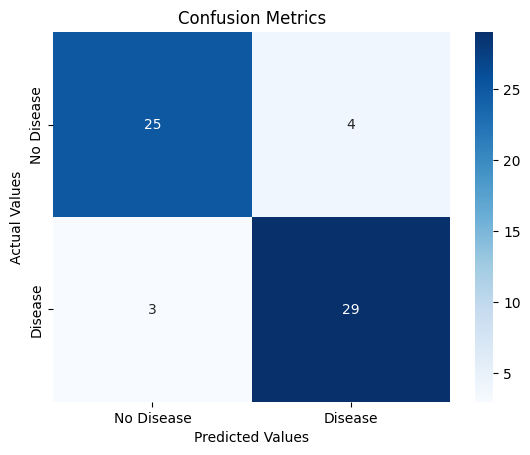

In [16]:
# Confusion Metrics
cm = confusion_matrix(Y_test , y_pred)
sns.heatmap(cm , annot=True , cmap = 'Blues' , xticklabels=['No Disease' , 'Disease'] , yticklabels=['No Disease' , 'Disease'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Metrics')
plt.show()

# 29 actual and predicted disease (model predicted) [TP]
# 25 actual and predicted no disease (model predicted) [TN]
# 4 actual no disease but predicted disease [FP]
# 3 actual disease but predicted no disease [FN]


In [17]:
print(classification_report(Y_test , y_pred)) # To check the performance of the Model
# Accuracy = ( TP + TN ) / Total
# Precision = TP / ( TP + FP ) Out of Predicted positives, how many are correct
# Recall = TP / ( TP + FN ) Out of Actual positives, how many did we catch
# F1-Score = Balance Between Recall and Precision

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [21]:
# Testing on only One Feature using LogisticRegression
x_Age = df[['age']]
y_Age = df['target']
x_AgeTrain , x_AgeTest , y_AgeTrain , y_AgeTest = train_test_split(x_Age , y_Age , test_size = 0.2 , random_state = 42)

In [23]:
scalar = StandardScaler()
x_AgeTrainScaled = scalar.fit_transform(x_AgeTrain)
x_AgeTestScaled = scalar.transform(x_AgeTest)
AgePredModel = LogisticRegression(max_iter=2000)
AgePredModel.fit(x_AgeTrain , y_AgeTrain)
y_AgePred = AgePredModel.predict(x_AgeTest)
print(classification_report(y_AgeTest , y_AgePred))


              precision    recall  f1-score   support

           0       0.55      0.38      0.45        29
           1       0.56      0.72      0.63        32

    accuracy                           0.56        61
   macro avg       0.56      0.55      0.54        61
weighted avg       0.56      0.56      0.54        61

